In [1]:
#External libraries

import numpy as np
import os
import sys

In [2]:
#Plotting settings

import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.patches as mpatches
plt.rcParams["axes.linewidth"]  = 2.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = 'False'
plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams['font.family']="serif"
plt.rc("text", usetex=True)
plt.rc("font", size=20)

In [3]:
#The module that needs to be tested

#Necessary for relative imports (see https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im)
module_path = os.path.abspath(os.path.join('../../'))           # '../../' is needed because the parent directory is two directories upstream of this test directory
if module_path not in sys.path:
    sys.path.append(module_path)

from kNN_ASMR import HelperFunctions as hf

# Loading data

In [4]:
field = np.random.rand(128, 128, 128) # A 3D grid with 128^3 grid points containing random values between 0 and 1
ngrid = 128
box_length = 1000.0 # Mpc/h
grid_cell_size = box_length/ngrid # Grid cell size in cMpc/h

ones = np.ones_like(field)
delta = (field)/np.mean(field) - ones # creating density contrast field from the 'field' array

print(f"The array delta has shape : {np.shape(delta)}")
print(f"The array delta has maximum value : {np.max(delta):.2f}")
print(f"The array delta has minimum value : {np.min(delta):.2f}")
print(f"The array delta has mean value    : {np.mean(delta):.2f}")

The array delta has shape : (128, 128, 128)
The array delta has maximum value : 1.00
The array delta has minimum value : -1.00
The array delta has mean value    : 0.00


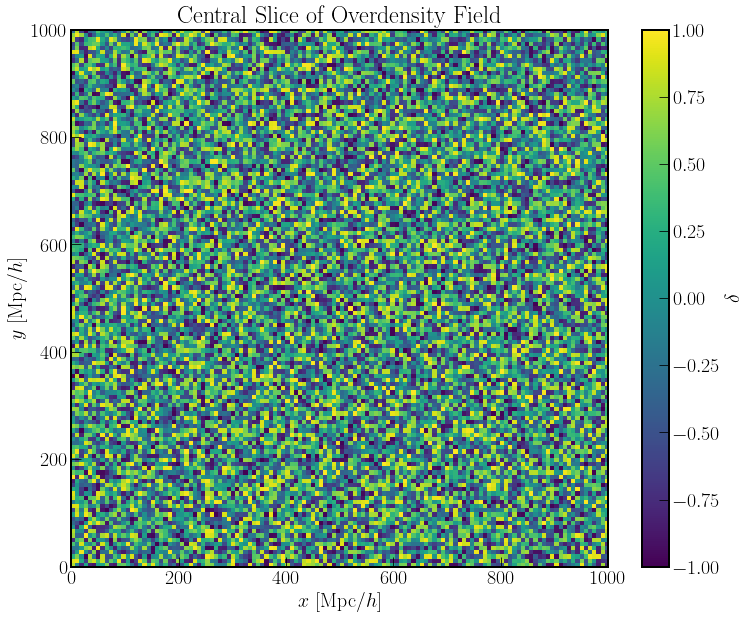

In [5]:
# Pick central slice along z-axis
slice_z = delta[:, :, ngrid // 2]

plt.figure(figsize=(11, 9))
plt.imshow(slice_z, origin='lower', cmap='viridis', extent=[0, box_length, 0, box_length], vmin=-1, vmax=1)
plt.colorbar(label=r'$\delta$')
plt.title(r"Central Slice of Overdensity Field")
plt.xlabel(r"$x\ [\mathrm{Mpc}/h]$")
plt.ylabel(r"$y\ [\mathrm{Mpc}/h]$")
plt.tight_layout()
plt.show()

# Testing smoothing_3D

### Top Hat filter

In [6]:
R = 15 #Mpc/h
tophat = hf.smoothing_3D(field=delta, Filter='Top-Hat', 
                      grid=ngrid, BoxSize=box_length, 
                      R=R, kmin=None, kmax=None, 
                      thickness=None, Verbose=True)


Starting smoothing ...
Smoothing completed.
Total time taken: 8.17e-02 s.


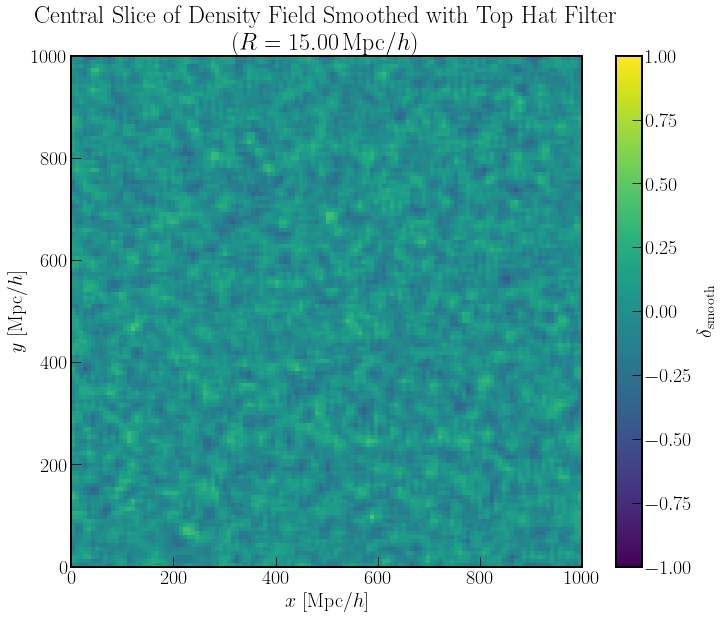

In [7]:
# Pick central slice along z-axis
slice_z = tophat[:, :, ngrid // 2]

plt.figure(figsize=(11, 9))
plt.imshow(slice_z, origin='lower', cmap='viridis', extent=[0, box_length, 0, box_length], vmin=-1, vmax=1)
plt.colorbar(label=r"$\delta_{\mathrm{smooth}}$")
plt.title(r"Central Slice of Density Field Smoothed with Top Hat Filter" "\n"
          r"($R = {:.2f}\,\mathrm{{Mpc}}/h$)".format(R))
plt.xlabel(r"$x\ [\mathrm{Mpc}/h]$")
plt.ylabel(r"$y\ [\mathrm{Mpc}/h]$")
plt.tight_layout()
plt.show()

### Gaussian Filter

In [8]:
R = 15 #Mpc/h
Gaussian = hf.smoothing_3D(field=delta, Filter='Gaussian', 
                      grid=ngrid, BoxSize=box_length, 
                      R=R, kmin=None, kmax=None, 
                      thickness=None, Verbose=True)


Starting smoothing ...
Smoothing completed.
Total time taken: 6.53e-02 s.


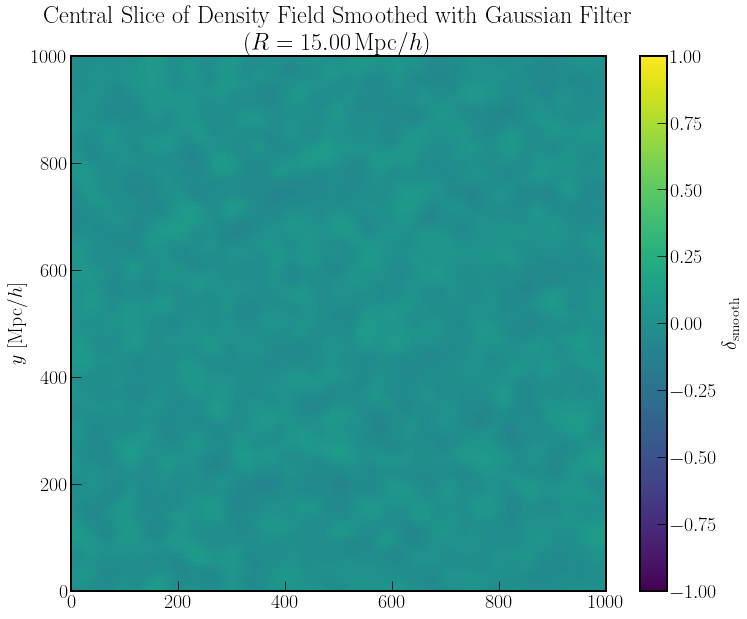

In [9]:
# Pick central slice along z-axis
slice_z = Gaussian[:, :, ngrid // 2]

plt.figure(figsize=(11, 9))
plt.imshow(slice_z, origin='lower', cmap='viridis', extent=[0, box_length, 0, box_length], vmin=-1, vmax=1)
plt.colorbar(label=r"$\delta_{\mathrm{smooth}}$")
plt.title(r"Central Slice of Density Field Smoothed with Gaussian Filter" "\n"
          r"($R = {:.2f}\,\mathrm{{Mpc}}/h$)".format(R))
plt.ylabel(r"$y\ [\mathrm{Mpc}/h]$")
plt.tight_layout()
plt.show()

### Top Hat (k space)

In [10]:
kmin = 0.01 #h/Mpc
kmax = 0.15 #h/Mpc
tophat_k = hf.smoothing_3D(field=delta, Filter='Top-Hat-k', 
                           grid=ngrid, BoxSize=box_length, 
                           R=None, kmin=kmin, kmax=kmax, 
                           thickness = None, Verbose=True)


Starting smoothing ...
Smoothing completed.
Total time taken: 7.98e-02 s.


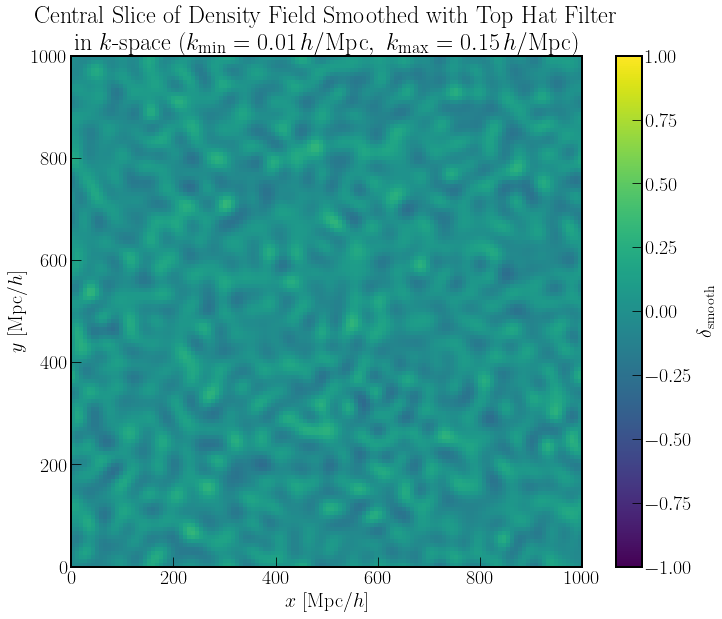

In [11]:
# Pick central slice along z-axis
slice_z = tophat_k[:, :, ngrid // 2]

plt.figure(figsize=(11, 9))
plt.imshow(slice_z, origin='lower', cmap='viridis', extent=[0, box_length, 0, box_length], vmin=-1, vmax=1)
plt.colorbar(label=r"$\delta_{\mathrm{smooth}}$")
plt.title(fr"""Central Slice of Density Field Smoothed with Top Hat Filter
in $k$-space ($k_{{\min}} = {kmin:.2f}\,h\mathrm{{/Mpc}},\ k_{{\max}} = {kmax:.2f}\,h\mathrm{{/Mpc}}$)""")
plt.xlabel(r"$x\ [\mathrm{Mpc}/h]$")
plt.ylabel(r"$y\ [\mathrm{Mpc}/h]$")
plt.tight_layout()
plt.show()

### Shell Filter

In [12]:
R = 15 #Mpc/h
thickness = 3 #Mpc/h
shell = hf.smoothing_3D(field=delta, Filter='Shell', 
                        grid=ngrid, BoxSize=box_length, 
                        R=R, kmin = None, kmax = None,
                        thickness=thickness, Verbose=True)


Starting smoothing ...

Generating shell-smoothed field ...
Smoothing completed.
Total time taken: 7.22e-02 s.


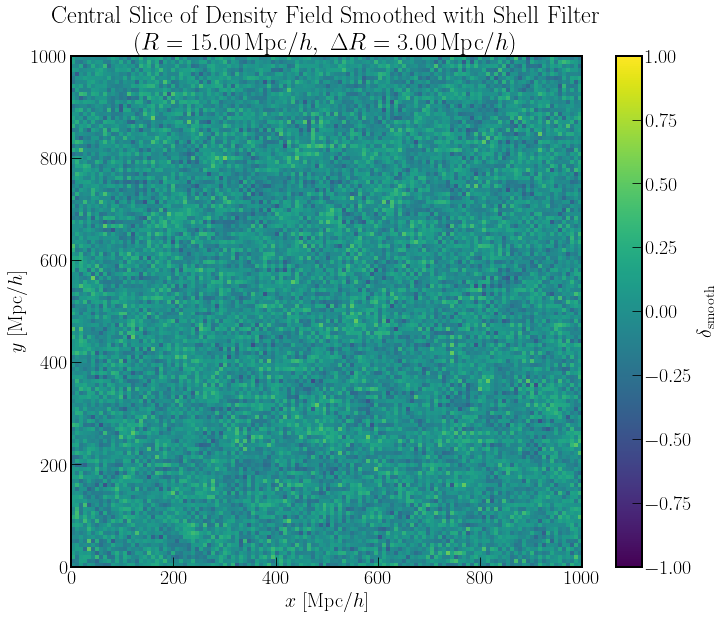

In [13]:
# Pick central slice along z-axis
slice_z = shell[:, :, ngrid // 2]

plt.figure(figsize=(11, 9))
plt.imshow(slice_z, origin='lower', cmap='viridis', extent=[0, box_length, 0, box_length], vmin=-1, vmax=1)
plt.colorbar(label=r"$\delta_{\mathrm{smooth}}$")
plt.title(fr"""Central Slice of Density Field Smoothed with Shell Filter
($R = {R:.2f}\,\mathrm{{Mpc}}/h,\ \Delta R = {thickness:.2f}\,\mathrm{{Mpc}}/h$)""")
plt.xlabel(r"$x\ [\mathrm{Mpc}/h]$")
plt.ylabel(r"$y\ [\mathrm{Mpc}/h]$")
plt.tight_layout()
plt.show()

# Testing create_smoothed_field_dict_3D

### Top Hat filter

In [14]:
bins = [np.linspace(10, 50, 8)]
bins

[array([10.        , 15.71428571, 21.42857143, 27.14285714, 32.85714286,
        38.57142857, 44.28571429, 50.        ])]

In [15]:
tophat_dict = hf.create_smoothed_field_dict_3D(field=delta, Filter='Top-Hat', 
                                            grid=ngrid, BoxSize=box_length, 
                                            bins=bins, thickness=None, Verbose=True)


Smoothing the density field over the radial distance scales...


Starting smoothing ...
Smoothing completed.
Total time taken: 5.95e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.60e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.66e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.15e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 6.13e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 6.53e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.94e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.06e-02 s.

Total time taken for all scales: 4.61e-01 s.


In [16]:
# Rounding the keys for the dictionary to 2 decimal digits
# The radial bins are not being changed, only the keys used to call values in the dictionary are changed
tophat_dict = {f"{float(k):.2f}": v for k, v in tophat_dict.items()}
keys = list(tophat_dict.keys())
print("Keys in the dictionary:", keys)

Keys in the dictionary: ['10.00', '15.71', '21.43', '27.14', '32.86', '38.57', '44.29', '50.00']


In [17]:
print(f"The shape of smoothed field for the second bin (R = {bins[0][1]:.2f} Mpc/h) is : {np.shape(tophat_dict[keys[1]])}")

The shape of smoothed field for the second bin (R = 15.71 Mpc/h) is : (128, 128, 128)


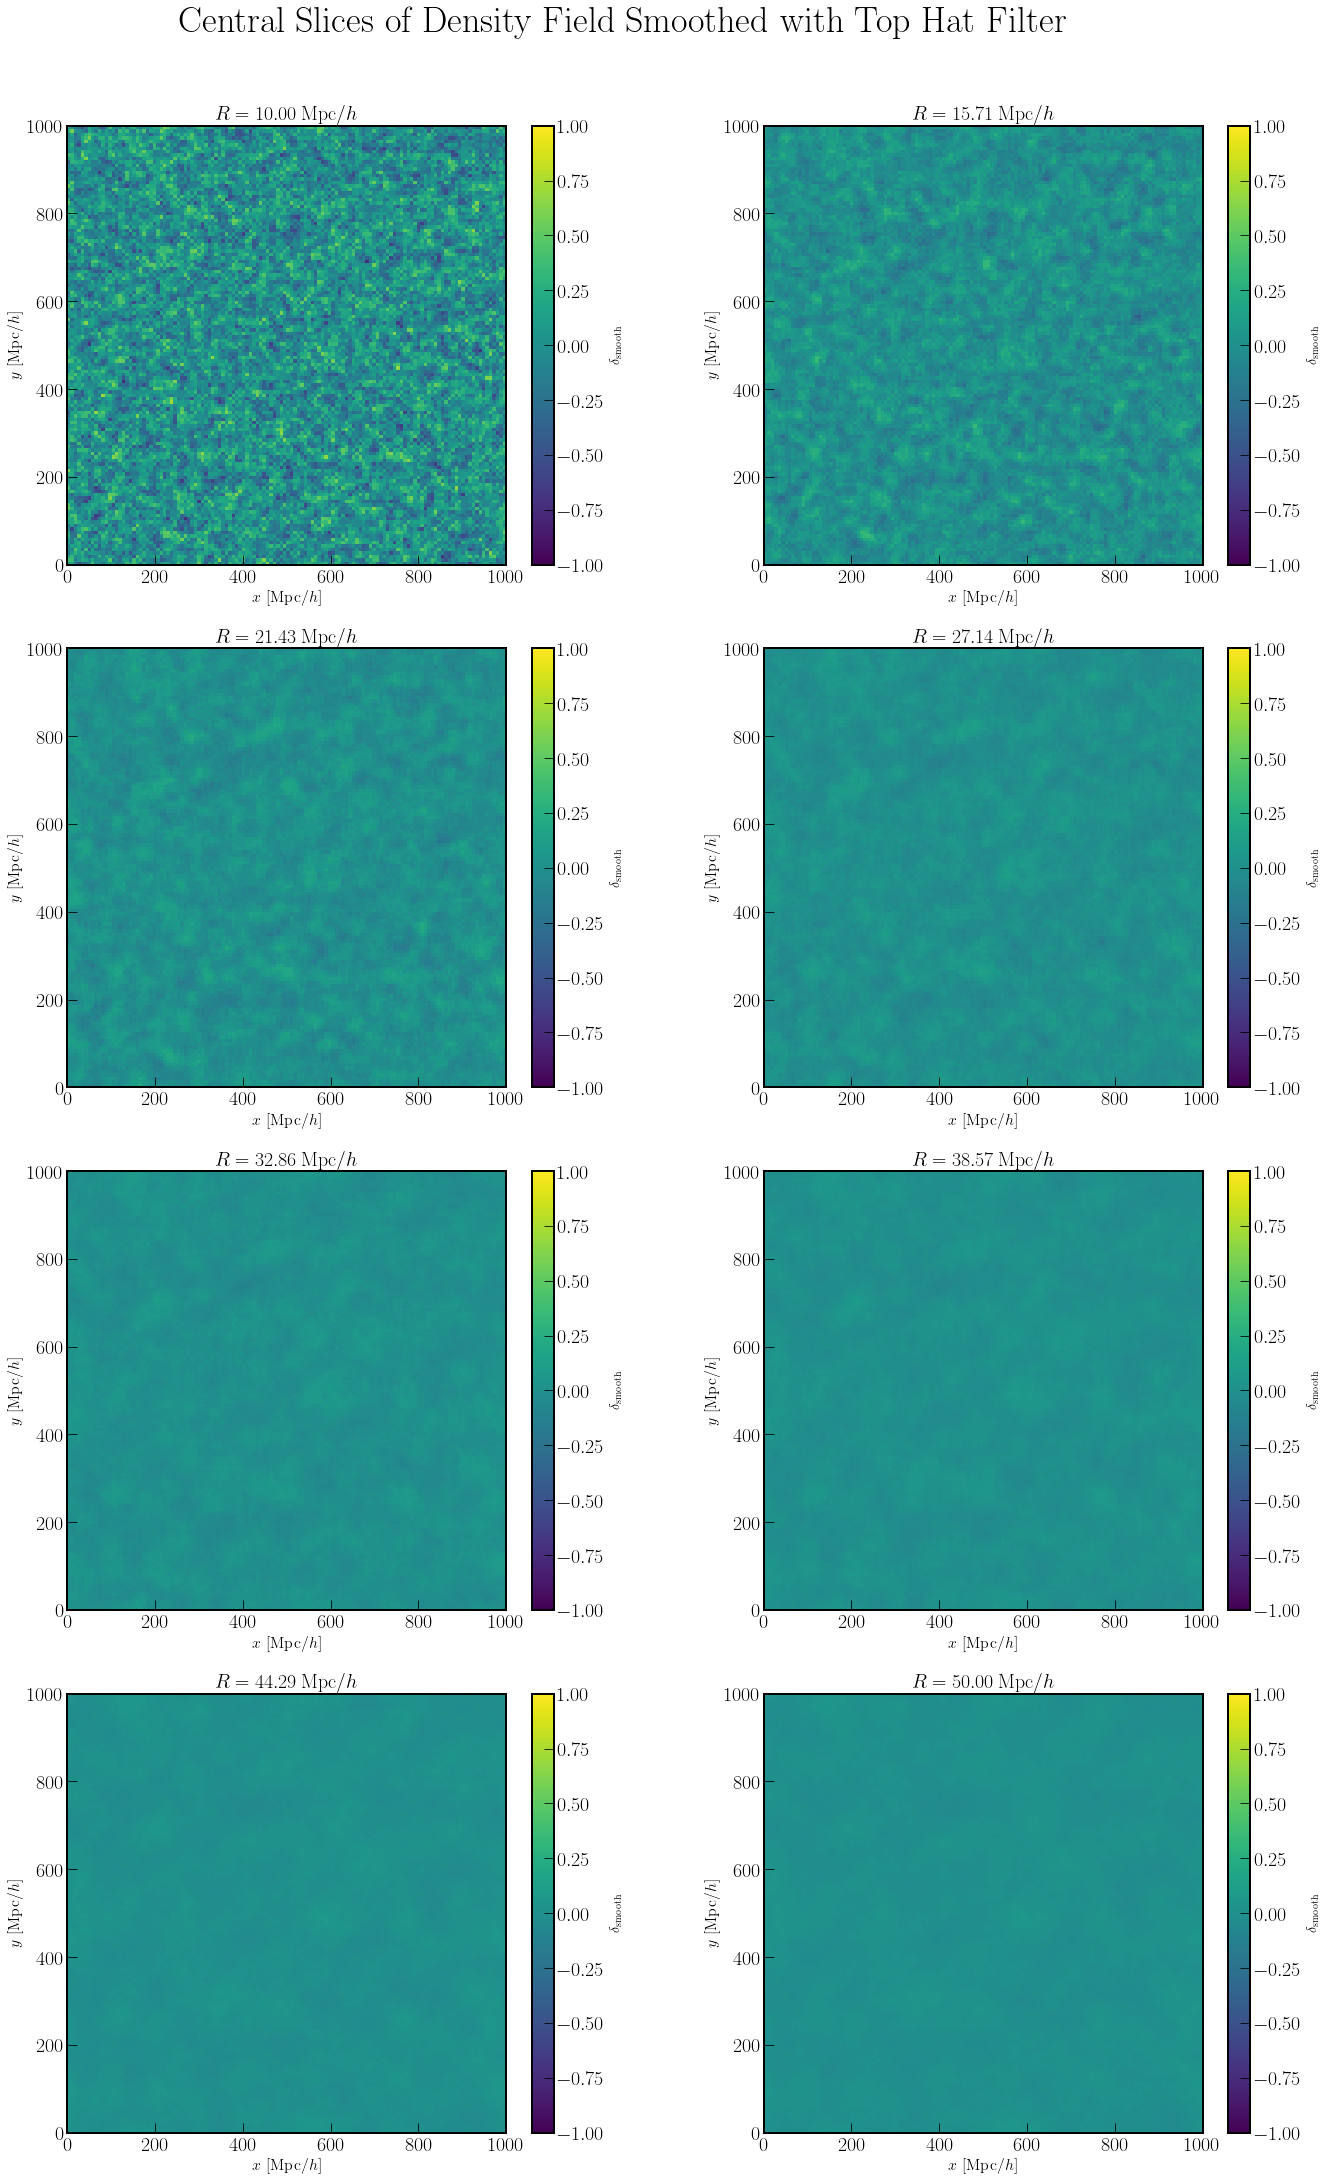

In [18]:
fig, axs = plt.subplots(4, 2, figsize=(20, 32))
axs = axs.ravel()  # Flatten to index with a single loop

for i in range(8):
    key = keys[i]
    data = tophat_dict[key]
    slice_z = data[:, :, ngrid // 2]
    
    im = axs[i].imshow(slice_z, origin='lower', cmap='viridis',
                       extent=[0, box_length, 0, box_length],
                       vmin=-1, vmax=1)
    axs[i].set_title(fr"$R = {float(key):.2f}\,\mathrm{{Mpc}}/h$", fontsize=20)
    axs[i].set_xlabel(r"$x\ [\mathrm{Mpc}/h]$", fontsize=16)
    axs[i].set_ylabel(r"$y\ [\mathrm{Mpc}/h]$", fontsize=16)
    
    cbar = plt.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04)
    cbar.set_label(r"$\delta_{\mathrm{smooth}}$", fontsize=14)

fig.suptitle("Central Slices of Density Field Smoothed with Top Hat Filter", fontsize=36)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])  
plt.show()

### Gaussian Filter

In [19]:
bins = [np.linspace(10, 50, 8)]
bins

[array([10.        , 15.71428571, 21.42857143, 27.14285714, 32.85714286,
        38.57142857, 44.28571429, 50.        ])]

In [20]:
gaussian_dict = hf.create_smoothed_field_dict_3D(field=delta, Filter='Gaussian', 
                                            grid=ngrid, BoxSize=box_length, 
                                            bins=bins, thickness=None, Verbose=True)


Smoothing the density field over the radial distance scales...


Starting smoothing ...
Smoothing completed.
Total time taken: 5.66e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.64e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.62e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.80e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.74e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.76e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.79e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.77e-02 s.

Total time taken for all scales: 4.58e-01 s.


In [21]:
# Rounding the keys for the dictionary to 2 decimal digits
# The radial bins are not being changed, only the keys used to call values in the dictionary are changed
gaussian_dict = {f"{float(k):.2f}": v for k, v in gaussian_dict.items()}
keys = list(gaussian_dict.keys())
print("Keys in the dictionary:", keys)

Keys in the dictionary: ['10.00', '15.71', '21.43', '27.14', '32.86', '38.57', '44.29', '50.00']


In [22]:
print(f"The shape of smoothed field for the second bin (R = {bins[0][1]:.2f} Mpc/h) is : {np.shape(gaussian_dict[keys[1]])}")

The shape of smoothed field for the second bin (R = 15.71 Mpc/h) is : (128, 128, 128)


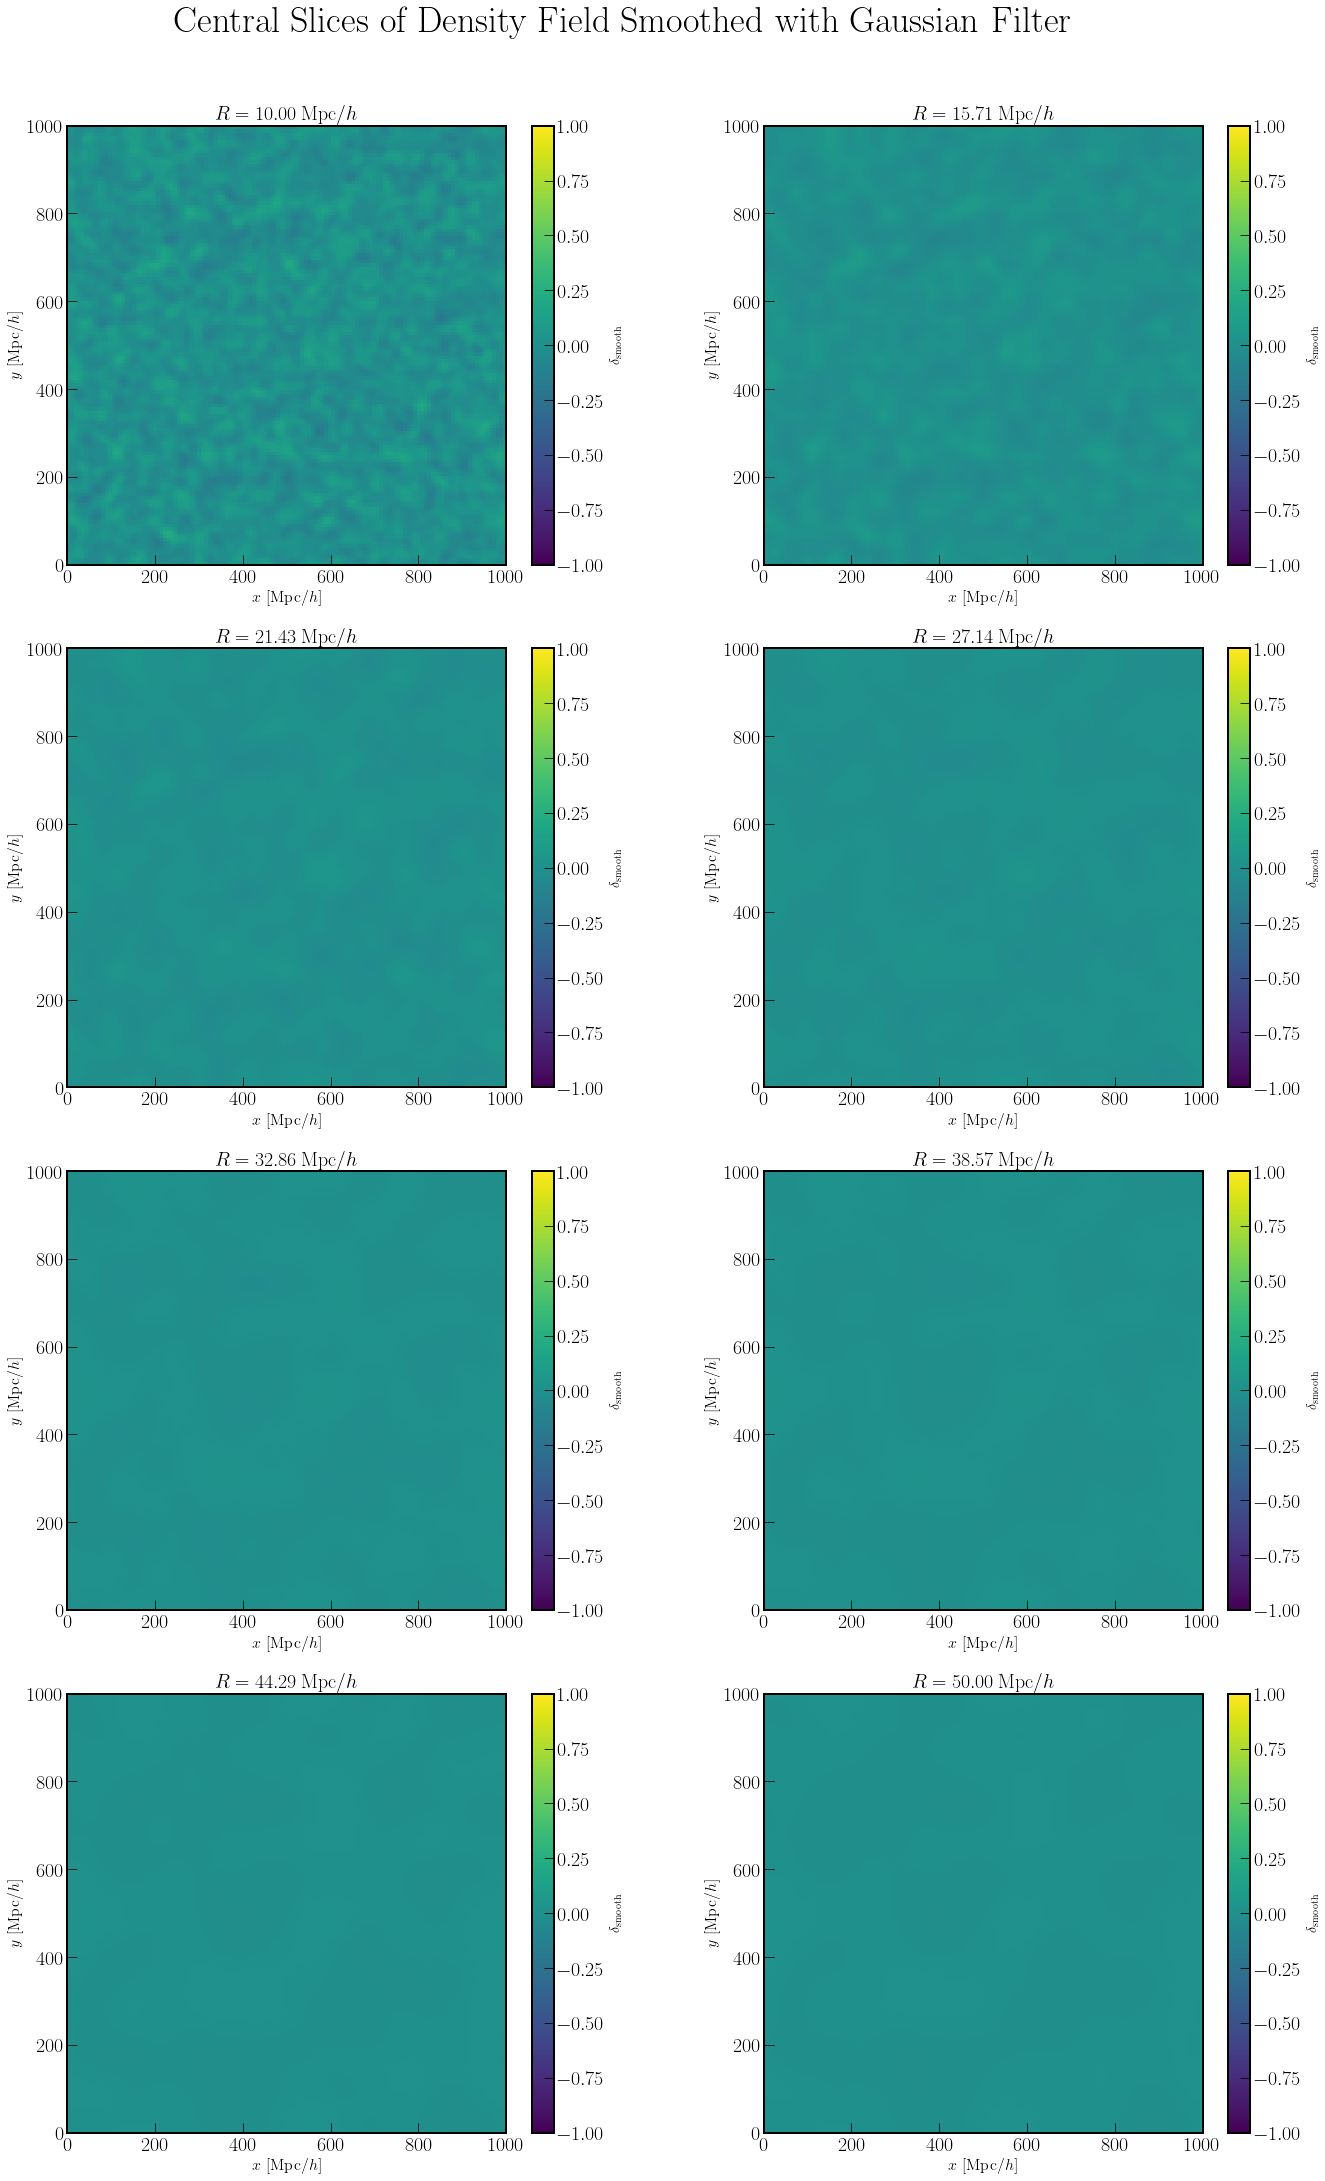

In [23]:
fig, axs = plt.subplots(4, 2, figsize=(20, 32))
axs = axs.ravel()  # Flatten to index with a single loop

for i in range(8):
    key = keys[i]
    data = gaussian_dict[key]
    slice_z = data[:, :, ngrid // 2]
    
    im = axs[i].imshow(slice_z, origin='lower', cmap='viridis',
                       extent=[0, box_length, 0, box_length],
                       vmin=-1, vmax=1)
    axs[i].set_title(fr"$R = {float(key):.2f}\,\mathrm{{Mpc}}/h$", fontsize=20)
    axs[i].set_xlabel(r"$x\ [\mathrm{Mpc}/h]$", fontsize=16)
    axs[i].set_ylabel(r"$y\ [\mathrm{Mpc}/h]$", fontsize=16)
    
    cbar = plt.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04)
    cbar.set_label(r"$\delta_{\mathrm{smooth}}$", fontsize=14)

fig.suptitle("Central Slices of Density Field Smoothed with Gaussian Filter", fontsize=36)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])  
plt.show()

### Shell filter


In [24]:
bins = [np.linspace(10, 50, 8)]
thickness = 2.5 # Mpc/h
bins

[array([10.        , 15.71428571, 21.42857143, 27.14285714, 32.85714286,
        38.57142857, 44.28571429, 50.        ])]

In [25]:
shell_dict = hf.create_smoothed_field_dict_3D(field=delta, Filter='Shell', 
                                            grid=ngrid, BoxSize=box_length, 
                                            bins=bins, thickness=thickness, Verbose=True)


Smoothing the density field over the radial distance scales...


Starting smoothing ...

Generating shell-smoothed field ...
Smoothing completed.
Total time taken: 8.48e-02 s.

Starting smoothing ...

Generating shell-smoothed field ...
Smoothing completed.
Total time taken: 5.70e-02 s.

Starting smoothing ...

Generating shell-smoothed field ...
Smoothing completed.
Total time taken: 5.53e-02 s.

Starting smoothing ...

Generating shell-smoothed field ...
Smoothing completed.
Total time taken: 5.63e-02 s.

Starting smoothing ...

Generating shell-smoothed field ...
Smoothing completed.
Total time taken: 5.51e-02 s.

Starting smoothing ...

Generating shell-smoothed field ...
Smoothing completed.
Total time taken: 5.92e-02 s.

Starting smoothing ...

Generating shell-smoothed field ...
Smoothing completed.
Total time taken: 6.28e-02 s.

Starting smoothing ...

Generating shell-smoothed field ...
Smoothing completed.
Total time taken: 7.58e-02 s.

Total time taken for all scales: 5.07e

In [26]:
# Rounding the keys for the dictionary to 2 decimal digits
# The radial bins are not being changed, only the keys used to call values in the dictionary are changed
shell_dict = {f"{float(k):.2f}": v for k, v in shell_dict.items()}
keys = list(shell_dict.keys())
print("Keys in the dictionary:", keys)

Keys in the dictionary: ['10.00', '15.71', '21.43', '27.14', '32.86', '38.57', '44.29', '50.00']


In [27]:
print(f"The shape of smoothed field for the second bin (R = {bins[0][1]:.2f} Mpc/h) is : {np.shape(shell_dict[keys[1]])}")

The shape of smoothed field for the second bin (R = 15.71 Mpc/h) is : (128, 128, 128)


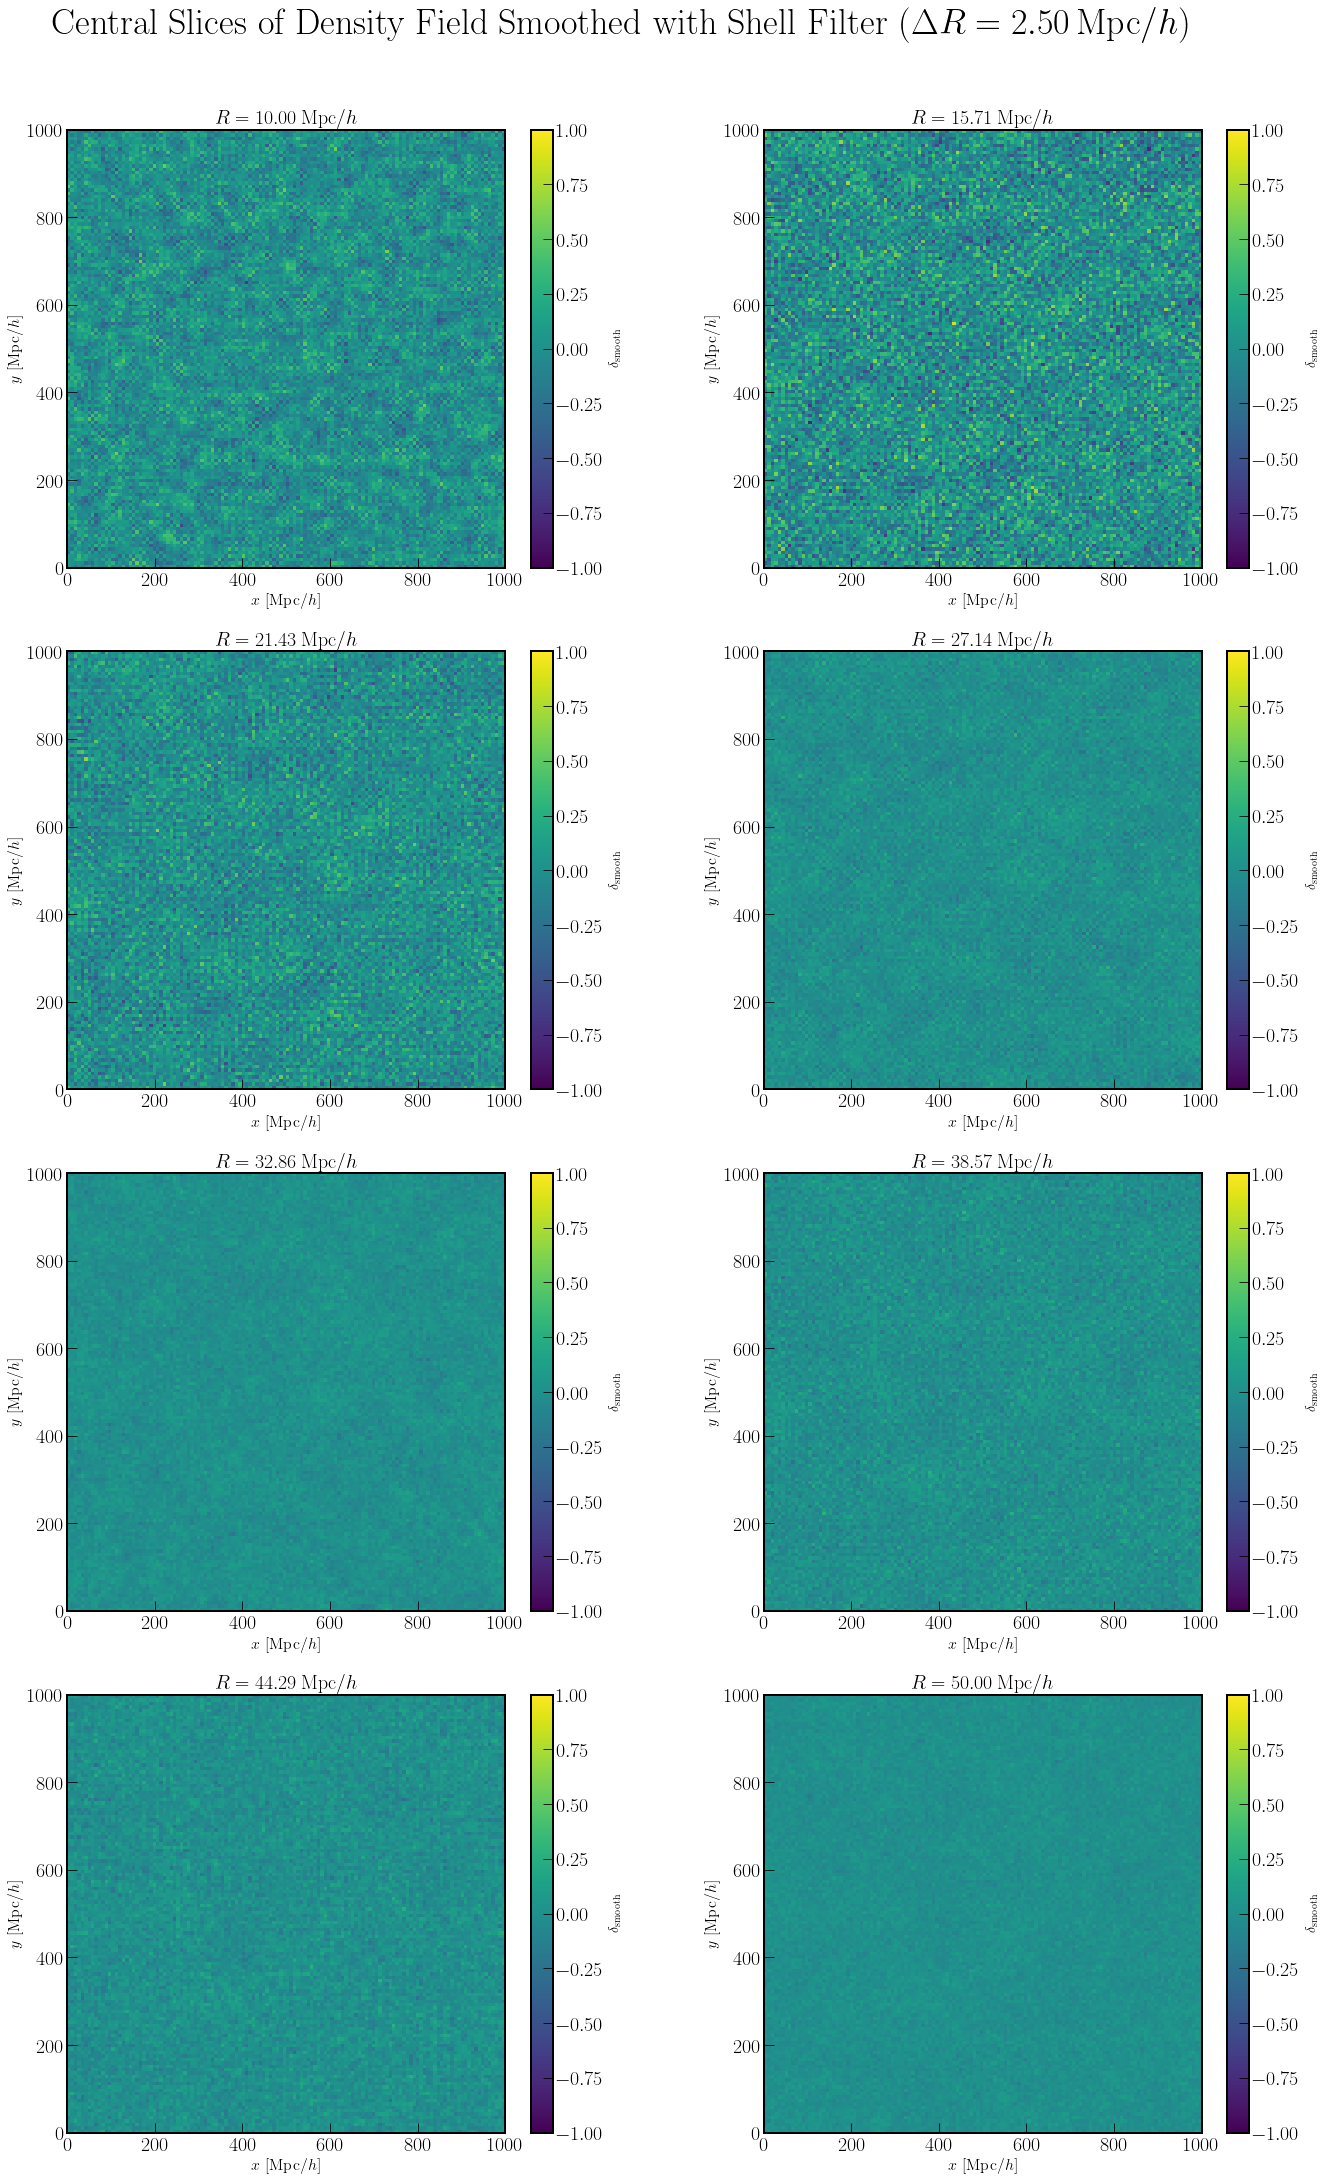

In [28]:
fig, axs = plt.subplots(4, 2, figsize=(20, 32))
axs = axs.ravel()  # Flatten to index with a single loop

for i in range(8):
    key = keys[i]
    data = shell_dict[key]
    slice_z = data[:, :, ngrid // 2]
    
    im = axs[i].imshow(slice_z, origin='lower', cmap='viridis',
                       extent=[0, box_length, 0, box_length],
                       vmin=-1, vmax=1)
    axs[i].set_title(fr"$R = {float(key):.2f}\,\mathrm{{Mpc}}/h$", fontsize=20)
    axs[i].set_xlabel(r"$x\ [\mathrm{Mpc}/h]$", fontsize=16)
    axs[i].set_ylabel(r"$y\ [\mathrm{Mpc}/h]$", fontsize=16)
    
    cbar = plt.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04)
    cbar.set_label(r"$\delta_{\mathrm{smooth}}$", fontsize=14)

fig.suptitle(fr"Central Slices of Density Field Smoothed with Shell Filter ($\Delta R = {thickness:.2f}\,\mathrm{{Mpc}}/h$)", fontsize=36)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])  
plt.show()

### Testing higher dimensional bin arrays

#### Useful when one wants to use the create_smoothed_field_dict_3D function for multiple k-NNs, so one can input a 2D array with multiple rows (for each k-value), each containing the set of radial scales for smoothing for that k-value

In [29]:
bins = [np.linspace(10, 50, 4), np.linspace(20, 60, 4)]
bins

[array([10.        , 23.33333333, 36.66666667, 50.        ]),
 array([20.        , 33.33333333, 46.66666667, 60.        ])]

In [30]:
tophat_dict = hf.create_smoothed_field_dict_3D(field=delta, Filter='Top-Hat', 
                                            grid=ngrid, BoxSize=box_length, 
                                            bins=bins, thickness=None, Verbose=True)


Smoothing the density field over the radial distance scales...


Starting smoothing ...
Smoothing completed.
Total time taken: 6.99e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 7.54e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.61e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.97e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.30e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.43e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.88e-02 s.

Starting smoothing ...
Smoothing completed.
Total time taken: 5.26e-02 s.

Total time taken for all scales: 4.80e-01 s.


In [31]:
# Rounding the keys for the dictionary to 2 decimal digits
# The radial bins are not being changed, only the keys used to call values in the dictionary are changed
tophat_dict = {f"{float(k):.2f}": v for k, v in tophat_dict.items()}

shape = np.shape(bins)
keys_flat = list(tophat_dict.keys())  

# Convert to the shape of bins using slicing
keys = [keys_flat[i * shape[1] : (i + 1) * shape[1]] for i in range(shape[0])]
print("Keys in the dictionary:", keys)

Keys in the dictionary: [['10.00', '23.33', '36.67', '50.00'], ['20.00', '33.33', '46.67', '60.00']]


In [32]:
print(f"The shape of smoothed field for the second bin of second row (R = {bins[1][1]:.2f} Mpc/h) is : {np.shape(tophat_dict[keys[1][1]])}")

The shape of smoothed field for the second bin of second row (R = 33.33 Mpc/h) is : (128, 128, 128)


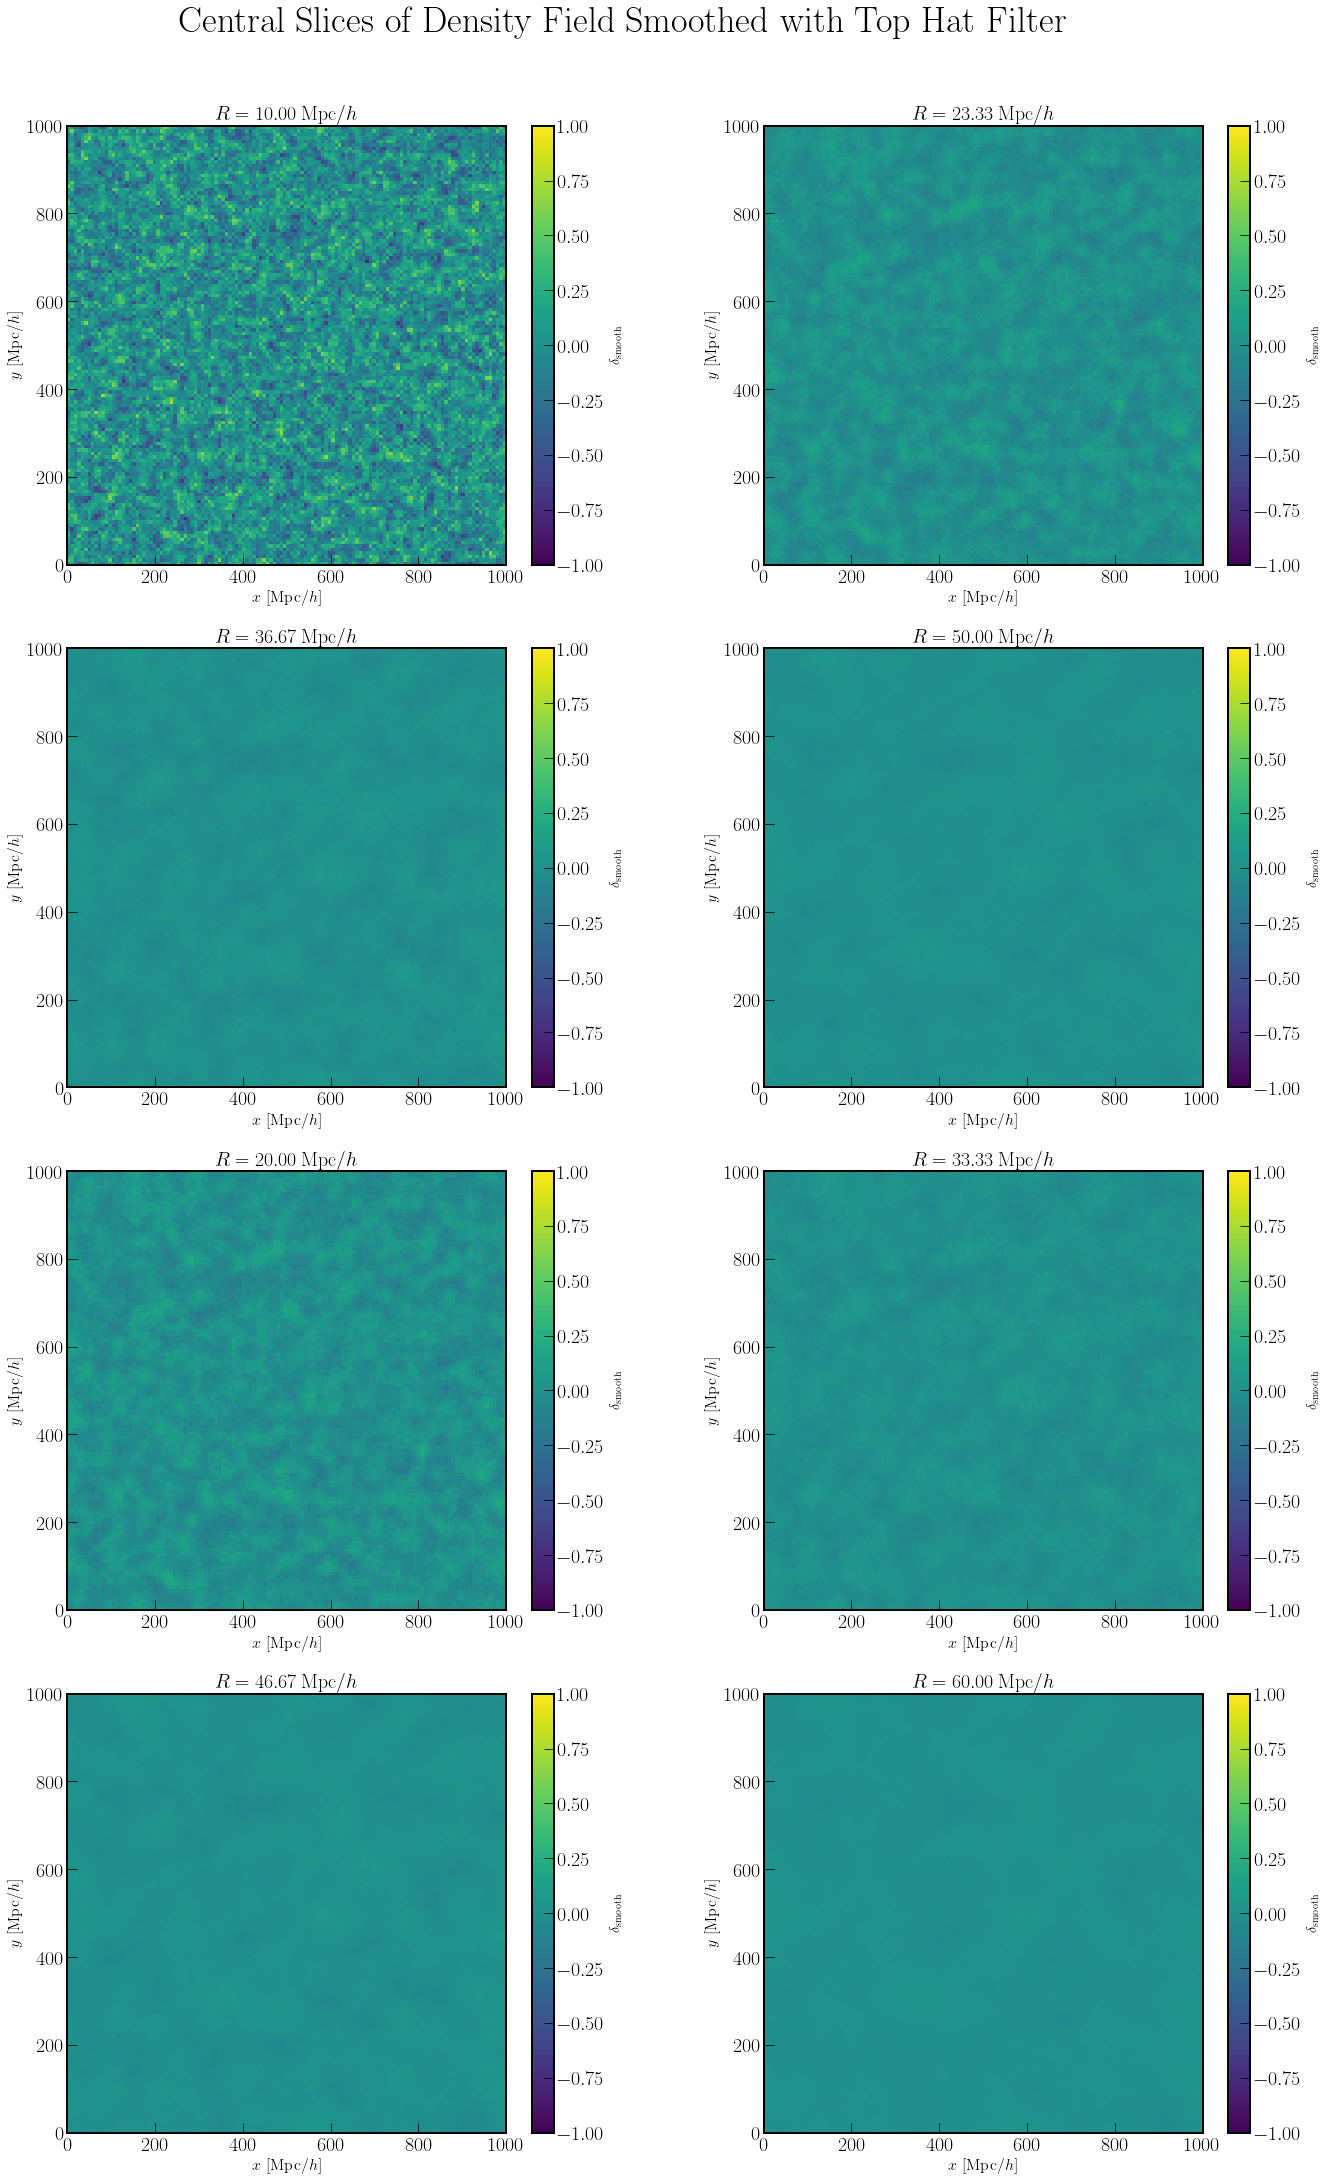

In [33]:
fig, axs = plt.subplots(4, 2, figsize=(20, 32))
axs = axs.ravel()  # Flatten to index with a single loop

# Loop over the 2D structure of keys
for idx, (i, j) in enumerate(np.ndindex(len(keys), len(keys[0]))):
    key = keys[i][j]
    data = tophat_dict[key]
    slice_z = data[:, :, ngrid // 2]

    im = axs[idx].imshow(slice_z, origin='lower', cmap='viridis',
                         extent=[0, box_length, 0, box_length],
                         vmin=-1, vmax=1)
    
    axs[idx].set_title(fr"$R = {float(key):.2f}\,\mathrm{{Mpc}}/h$", fontsize=20)
    axs[idx].set_xlabel(r"$x\ [\mathrm{Mpc}/h]$", fontsize=16)
    axs[idx].set_ylabel(r"$y\ [\mathrm{Mpc}/h]$", fontsize=16)
    
    cbar = plt.colorbar(im, ax=axs[idx], fraction=0.046, pad=0.04)
    cbar.set_label(r"$\delta_{\mathrm{smooth}}$", fontsize=14)

fig.suptitle("Central Slices of Density Field Smoothed with Top Hat Filter", fontsize=36)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()